In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [4]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


5699 comuns by 41 rows

most of clumns are not numerical type

column names need to to be changed to snakecase

In [5]:
def clean_names(string):
    string = string.replace('[','')
    string = string.replace(']','')
    string = string.strip()
    string = string.lower()
    string = string.replace(' ','_')
    
    return string
                   
cleaned_name = []
for c in exchange_rates.columns:
    cleaned_name.append(clean_names(c))
exchange_rates.columns = cleaned_name

In [6]:
cleaned_name = exchange_rates.columns
cleaned_name =list(cleaned_name)
cleaned_name[0] = 'time'
exchange_rates.columns = cleaned_name

In [7]:
exchange_rates.head()

,time,australian_dollar,bulgarian_lev,brazilian_real,canadian_dollar,swiss_franc,chinese_yuan_renminbi,cypriot_pound,czech_koruna,danish_krone,...,romanian_leu,russian_rouble,swedish_krona,singapore_dollar,slovenian_tolar,slovak_koruna,thai_baht,turkish_lira,us_dollar,south_african_rand
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [8]:
# sort the rows by time
exchange_rates['time'] = pd.to_datetime(exchange_rates['time'])
exchange_rates = exchange_rates.sort_values('time')
exchange_rates.reset_index(drop=True, inplace=True)

In [9]:
euro_to_dollar = exchange_rates[['time','us_dollar']]
euro_to_dollar = euro_to_dollar[euro_to_dollar['us_dollar']!= '-']
print(euro_to_dollar['us_dollar'].value_counts())
euro_to_dollar['us_dollar'] = euro_to_dollar['us_dollar'].astype(float)
euro_to_dollar.describe()

1.2276    9
1.1215    8
1.1305    7
1.3532    6
1.0888    6
         ..
1.4692    1
1.2722    1
0.8797    1
0.9264    1
1.4230    1
Name: us_dollar, Length: 3527, dtype: int64


,us_dollar
count,5637.000000
mean,1.199704
std,0.162328
min,0.825200
25%,1.098200
50%,1.202300
75%,1.320300
max,1.599000


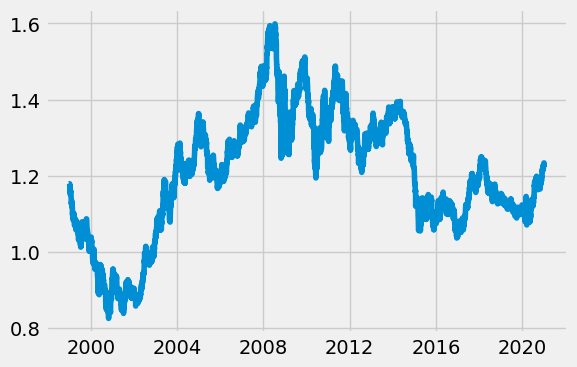

In [23]:
plt.plot(euro_to_dollar['time'],euro_to_dollar['us_dollar'])

plt.show()

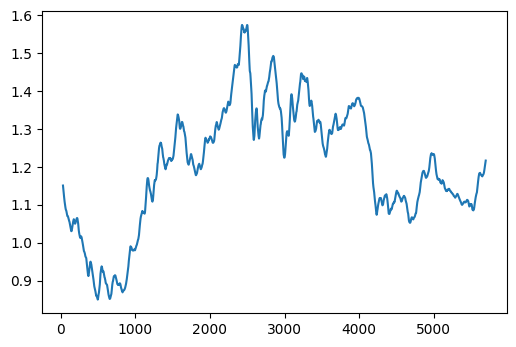

In [15]:
# calculate the rolling mean and use that to smoothen the graph
euro_to_dollar['rolling_mean'] = euro_to_dollar['us_dollar'].rolling(30).mean()


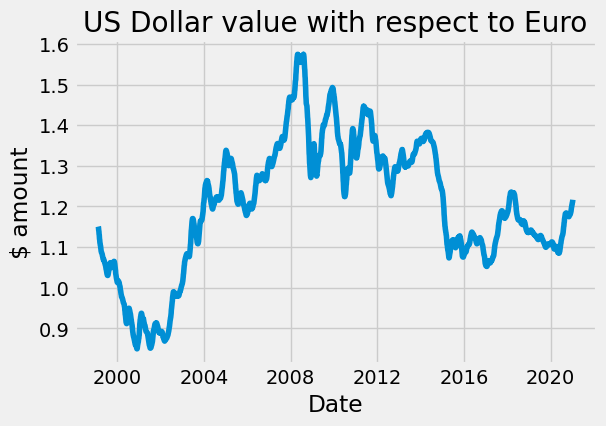

In [24]:
plt.plot(euro_to_dollar['time'],euro_to_dollar['rolling_mean'])
plt.ylabel('$ amount')
plt.xlabel('Date')
plt.title('US Dollar value with respect to Euro')
plt.show()

## lets look at how the Euro - US Dollar relationship changed under each US president.
W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). 

In [26]:
bush_era = euro_to_dollar[euro_to_dollar.time.dt.year.between(2001,2009)]
obama_era = euro_to_dollar[euro_to_dollar.time.dt.year.between(2009,2017)]
trump_era = euro_to_dollar[euro_to_dollar.time.dt.year.between(2017,2021)]

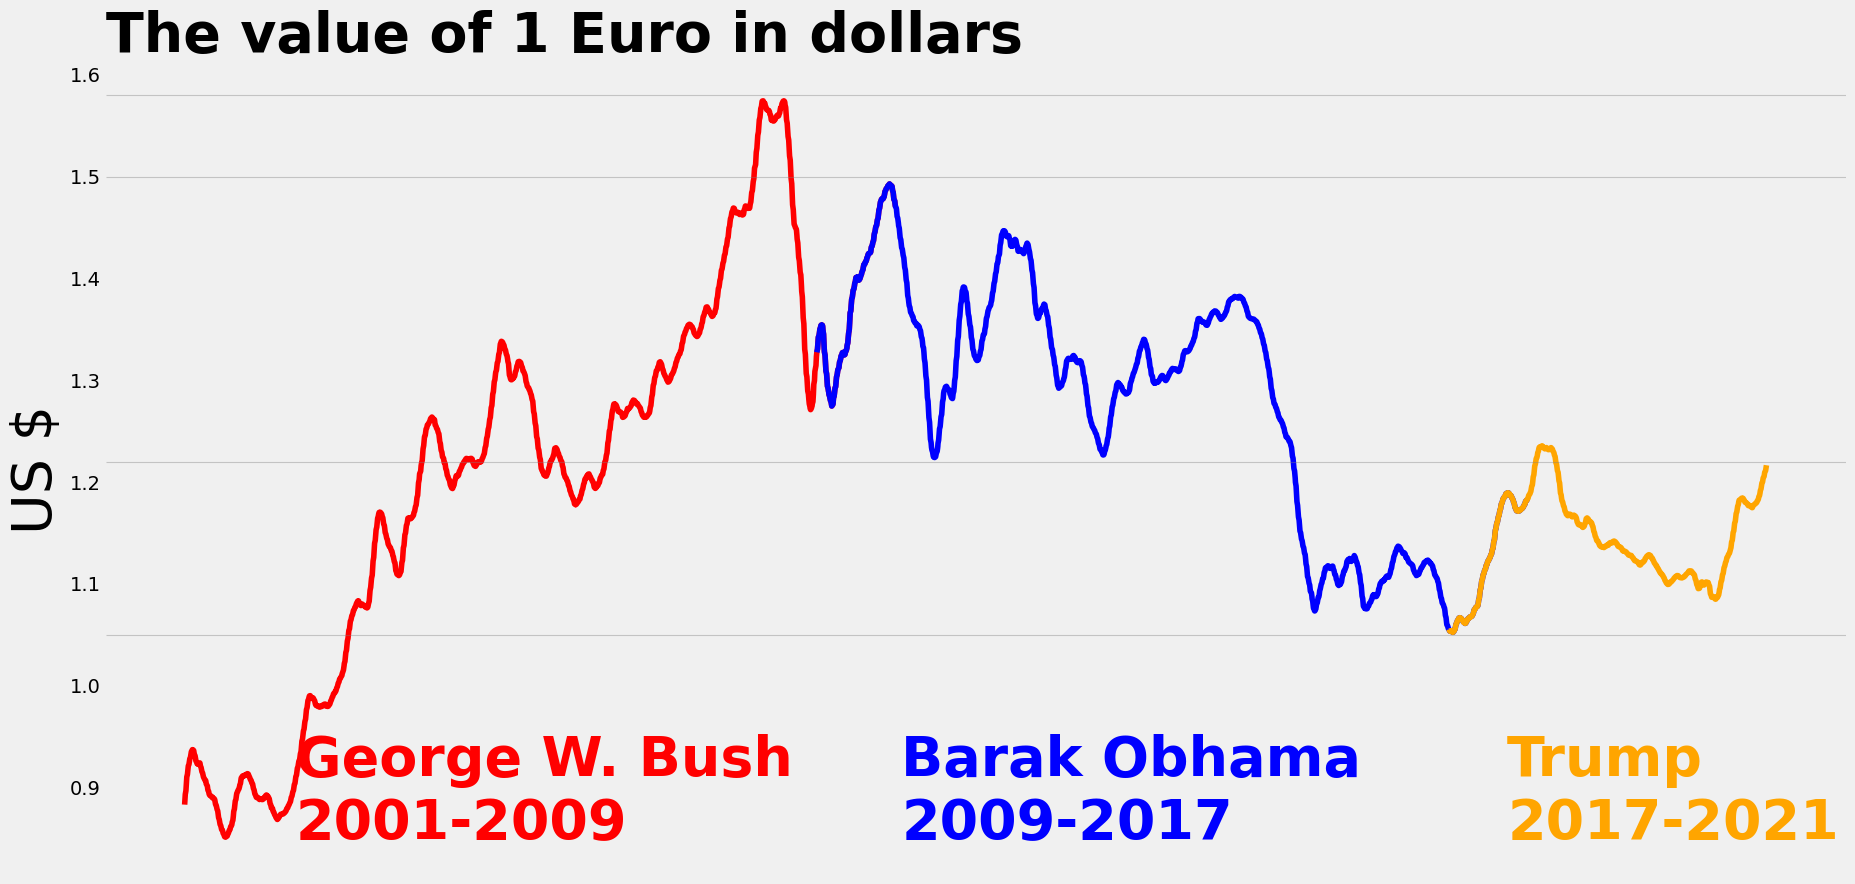

In [143]:
f,ax=plt.subplots(1,figsize=(20,10))
ax.plot(bush_era['time'],bush_era['rolling_mean'],color='r')
ax.plot(obama_era['time'],obama_era['rolling_mean'], c='b')
ax.plot(trump_era['time'],trump_era['rolling_mean'], c='orange')
ax.grid(None)
for spine in ['left','right','top','bottom']:
    ax.spines[spine].set_visible(False)
ax.set_xticklabels([])
ax.set_ylabel('US $', fontsize=40)
ax.set_title('The value of 1 Euro in dollars',weight='bold', size=40, loc='left')
ax.text(731000.0,0.85,'George W. Bush\n2001-2009',size=40,weight='bold',color='r')
ax.text(733800.0,0.85,'Barak Obhama\n2009-2017',size=40,weight='bold',color='b')
ax.text(736600.0,0.85,'Trump\n2017-2021',size=40,weight='bold',color='orange')
ax.axhline(1.58,c='grey',alpha=0.4,linewidth=0.8)
ax.axhline(1.5,c='grey',alpha=0.4,linewidth=0.8)
ax.axhline(1.05,c='grey',alpha=0.4,linewidth=0.8)
ax.axhline(1.22,c='grey',alpha=0.4,linewidth=0.8)